#  Homework 2

## APMTH 207: Stochastic Methods for Data Analysis, Inference and Optimization

**Due Date: ** Thursday, Febrary 9th, 2017 at 11:59pm

**Instructions:**

- Upload your final answers as well as your iPython notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Problem 1: Monte Carlo Integration

Let $X$ be a random variable with distribution described by the following pdf:

$$
f_X(x) = \begin{cases}
\frac{1}{12}(x-1), &1\leq x\leq 3\\
-\frac{1}{12}(x-5), &3< x\leq 5\\
\frac{1}{6}(x-5), &5< x\leq 7\\
-\frac{1}{6}(x-9), &7< x\leq 9\\
0, &otherwise
\end{cases}
$$

Let $h$ be the following function of $X$:

$$
h(X) = \frac{1}{3\sqrt{2}\pi}\mathrm{exp}\left\{ -\frac{1}{18}\left( X - 5\right)^2\right\}
$$

Compute $\mathbb{E}[h(X)]$ via Monte Carlo simulation using the following sampling methods:
- inverse transform sampling
- rejection sampling with both uniform proposal distribution and normal proposal distribution (steroids) (with appropriately chosen parameters)
- importance sampling with both uniform proposal distribution and normal proposal distribution (with appropriately chosen parameters)

First, we can calculate the CDF of $h_x(x)$
$$
F(x) = \begin{cases}
\frac{1}{24}+\frac{1}{12}(\frac{x^2}{2}-x), &1\leq x\leq 3\\
-\frac{17}{24}-\frac{1}{12}(\frac{x^2}{2}-5x), &3< x\leq 5\\
\frac{29}{12}+\frac{1}{6}(\frac{x^2}{2}-5x), &5< x\leq 7\\
-\frac{69}{12}-\frac{1}{6}(\frac{x^2}{2}-9x), &7< x\leq 9\\
1, &otherwise
\end{cases}
$$

Second, we can calculate the inverse CDF of $h_x(x)$
$$
F_{X}^{-1}(u) = \begin{cases}
2\sqrt{6u}+1, &0\leq x\leq 1/6\\
-2\sqrt{-6u+2}+5, &1/6< x\leq 1/3\\
2\sqrt{3u-1}+5, &1/3< x\leq 2/3\\
-2\sqrt{-3u+3}+9, &2/3< x\leq 1\\
NA, &otherwise
\end{cases}
$$

First, we can take a look at the shape of the pdf

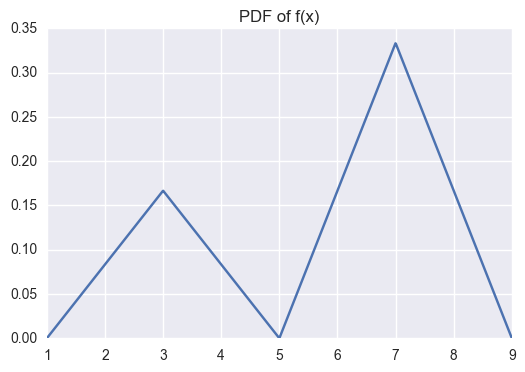

In [17]:
def P(x):
    if (x >= 1 and x <= 3):
        y = (1/12)*(x - 1)
    elif (x > 3 and x <= 5):
        y = -(1/12)*(x - 5)
    elif (x > 5 and x <= 7):
        y = (1/6)*(x - 5)
    elif (x > 7 and x <= 9):
        y = -(1/6)*(x - 9)
    else:
        y = 0
    return y

x_p= np.linspace(1,9,1000)
y_p = np.zeros(1000)
for i in range(1000):
    y_p[i] = P(x_p[i])

plt.plot(x_p,y_p)
plt.title('PDF of f(x)')

### Inverse Transform Sampling 

Estimated expectation: 0.0588708775436


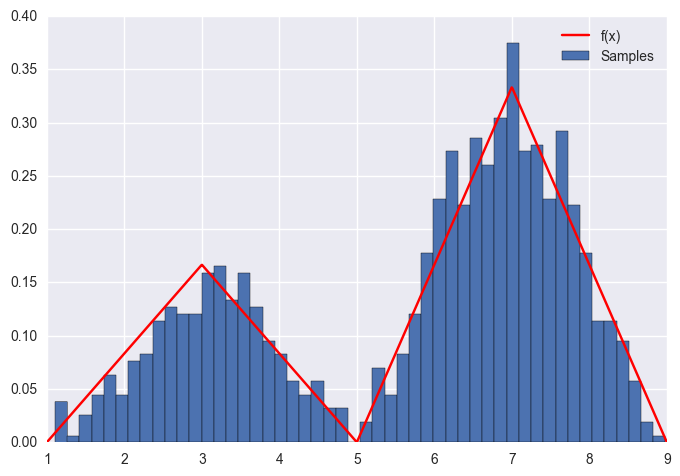

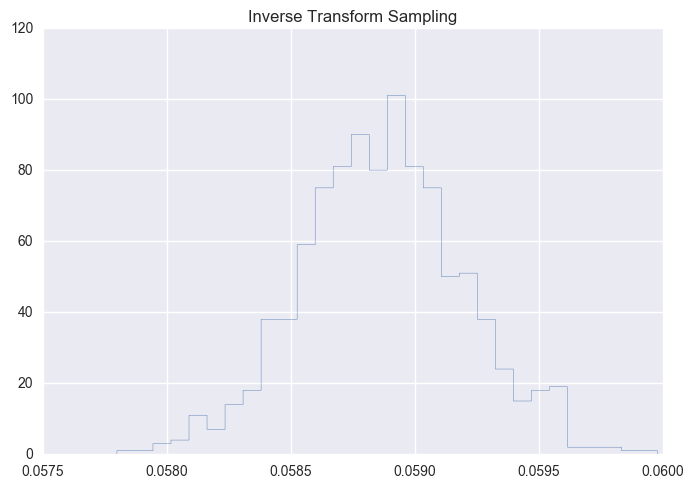

In [3]:
h = lambda x:1/(3*np.sqrt(2)*np.pi)*np.exp(-1/18*(x-5)**2)
N = 1000
def P(x):
    if (x >= 1 and x <= 3):
        y = (1/12)*(x - 1)
    elif (x > 3 and x <= 5):
        y = -(1/12)*(x - 5)
    elif (x > 5 and x <= 7):
        y = (1/6)*(x - 5)
    elif (x > 7 and x <= 9):
        y = -(1/6)*(x - 9)
    else:
        y = 0
    return y

def invCDF(x):
    y = np.zeros(len(x))
    for i in range(len(x)):
        if (x[i] >= 0 and x[i] <= 1/6):
            y[i] = 1 + np.sqrt(24*x[i])
        elif (x[i] > 1/6 and x[i] <= 1/3):
            y[i] = 5 - np.sqrt(8 - 24*x[i])
        elif (x[i] > 1/3 and x[i] <= 2/3):
            y[i] = 5 + np.sqrt(12*x[i] -4)
        elif (x[i] > 2/3 and x[i] <= 1):
            y[i] = 9 - np.sqrt(12-12*x[i])
        else:
            y[i]=1
    return y  

def CDF(x):
    
    if (x >= 1 and x <= 3):
        y = 1/24+(1/12)*(x**2/2 - x)
    elif (x > 3 and x <= 5):
        y = -17/24-(1/12)*(x**2/2 - 5*x)
    elif (x > 5 and x <= 7):
        y = 29/12+(1/6)*(x**2/2 - 5*x)
    elif (x > 7 and x <= 9):
        y = -69/12-(1/6)*(x**2/2 - 9*x)
    else:
        y = 1
    return y

xmin = 1 # the lower limit of our domain
xmax = 9 # the upper limit of our domain

# range limits
rmin = CDF(xmin)
rmax = CDF(xmax)

R = np.random.uniform(rmin, rmax, N)
X = invCDF(R)

# get the histogram info
hinfo = np.histogram(X,100)

# plot the histogram

Iis = np.zeros(1000)
for k in range(0,1000):
    R = np.random.uniform(rmin, rmax, N)
    X = invCDF(R)
    Iis[k] = np.mean(h(X))


print ('Estimated expectation:',np.mean(Iis))
plt.hist(X,bins=50, label=u'Samples',normed = True);
plt.plot(x_p,y_p,'r',label = u'f(x)')
plt.legend()
plt.show()
plt.hist(Iis,30, histtype='step', label=u'Inverse Transform Sampling')
plt.title('Inverse Transform Sampling')


### Rejection Sampling with Uniform Proposal Distribution 

Mean from rejection sampling with uniform proposal: 0.0588678428513


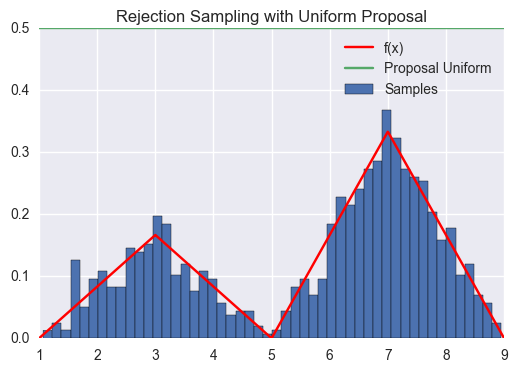

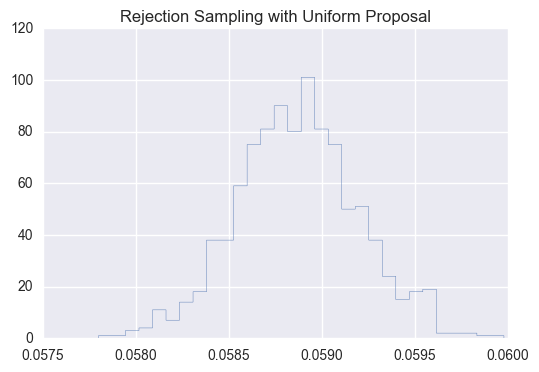

In [37]:
N = 1000
def P(x):
    if (x >= 1 and x <= 3):
        y = (1/12)*(x - 1)
    elif (x > 3 and x <= 5):
        y = -(1/12)*(x - 5)
    elif (x > 5 and x <= 7):
        y = (1/6)*(x - 5)
    elif (x > 7 and x <= 9):
        y = -(1/6)*(x - 9)
    else:
        y = 0
    return y

# domain limits
xmin = 1 # the lower limit of our domain
xmax = 9 # the upper limit of our domain

# range limit (supremum) for y
ymax = 1
#you might have to do an optimization to find this.

#N = 1000 # the total of samples we wish to generate
accepted = 0 # the number of accepted samples

h = np.zeros(N)
count = 0 # the total count of proposals

# generation loop
Iis1 = np.zeros(1000)
for k in np.arange(0,1000):
    samples = np.zeros(N)
    accepted = 0 # the number of accepted samples
    while (accepted < N):

        # pick a uniform number on [xmin, xmax) (e.g. 0...10)
        x = np.random.uniform(xmin, xmax)
        #print ('x',x)

        # pick a uniform number on [0, ymax)
        y = np.random.uniform(0,ymax)

        # Do the accept/reject comparison
        if y < P(x):
            samples[accepted] = x
            #print ('dzc',x)
            h[accepted] = 1/(3*np.sqrt(2)*np.pi)*np.exp(-1/18*(x-5)**2)
            
            accepted += 1
    #print (h)
    Iis1[k] = np.mean(h)

hinfo = np.histogram(samples,50)

# plot the histogram
plt.hist(samples,bins=50, label=u'Samples',normed=True);
plt.title("Rejection Sampling with Uniform Proposal")

# plot our (normalized) function
xvals=np.linspace(xmin, xmax, 1000)
plt.plot(x_p,y_p,'r',label = u'f(x)')
uni = np.zeros(1000)
uni[:1000] = 0.5
#print (uni)
plt.plot(xvals,uni,label=u'Proposal Uniform')
#mean_h = np.mean(h)
print ('Mean from rejection sampling with uniform proposal:',np.mean(Iis1))

plt.legend()
plt.show()
plt.hist(Iis,30, histtype='step', label=u'Rejection Sampling with Uniform Proposal')
plt.title('Rejection Sampling with Uniform Proposal')

### Rejection Sampling with Normal Proposal Distribution

Mean from rejection sampling with normal proposal: 0.0588649239963


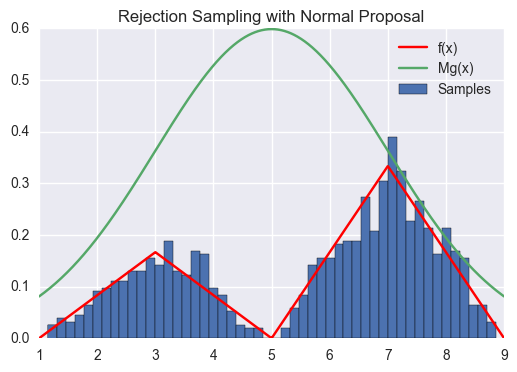

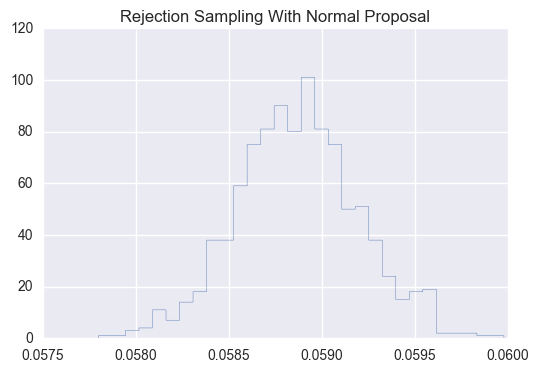

In [58]:
N = 1000 # the total of samples we wish to generate
mu = 5
sig = 2
g = lambda x: (1/np.sqrt(2*np.pi*sig**2))*np.exp(-(x-mu)**2/(2.0*sig**2)) 
M = 3  
#gM = 3 * g  # our proposal pdf (we're thus choosing M to 3)

# domain limits
xmin = 1 # the lower limit of our domain
xmax = 9 # the upper limit of our domain

# range limits for inverse sampling
#umin = invCDFg(xmin)
#umax = invCDFg(xmax)

accepted = 0 # the number of accepted samples

count = 0 # the total count of proposals
h = np.zeros(N)
# generation loop
Iis2 = np.zeros(1000)
norm = np.zeros(1000)


for k in np.arange(0,1000):
    samples = np.zeros(N)
    accepted = 0
    while (accepted < N):

        # Sample from g using random normal distribution
        xproposal = mu + sig*np.random.randn(1)
        
        # pick a uniform number on [0, 1)
        y = np.random.uniform(0,1)

        # Do the accept/reject comparison
        if y < P(xproposal)/(M*g(xproposal)):
            samples[accepted] = xproposal        
            h[accepted] = 1/(3*np.sqrt(2)*np.pi)*np.exp(-1/18*(xproposal-5)**2)
            accepted += 1

    Iis2[k] = np.mean(h)


        #count +=1
    
#print("Count", count, "Accepted", accepted)

# get the histogram info
hinfo = np.histogram(samples,50)

# plot the histogram
plt.hist(samples,bins=50, normed = True, label=u'Samples');
plt.plot(x_p,y_p,'r',label = u'f(x)')
plt.title('Rejection Sampling with Normal Proposal')

# plot our (normalized) function
xvals=np.linspace(xmin, xmax, 1000)
norm = M*g(xvals)
plt.plot(x_p,norm,label=u'Mg(x)')
#plt.plot(xvals, hinfo[0][0]*P(xvals), 'r', label=u'p(x)')
#plt.plot(xvals, hinfo[0][0]*g(xvals), 'k', label=u'g(x)')
#mean_h = np.mean(h)
print ('Mean from rejection sampling with normal proposal:',np.mean(Iis2))


# turn on the legend
plt.legend()
plt.show()

plt.hist(Iis,30, histtype='step', label=u'Rejection Sampling With Normal Proposal')
plt.title('Rejection Sampling With Normal Proposal')

### Importance Sampling with Uniform Proposal Distribution

Mean importance sampling MC estimate:  0.0589049024109


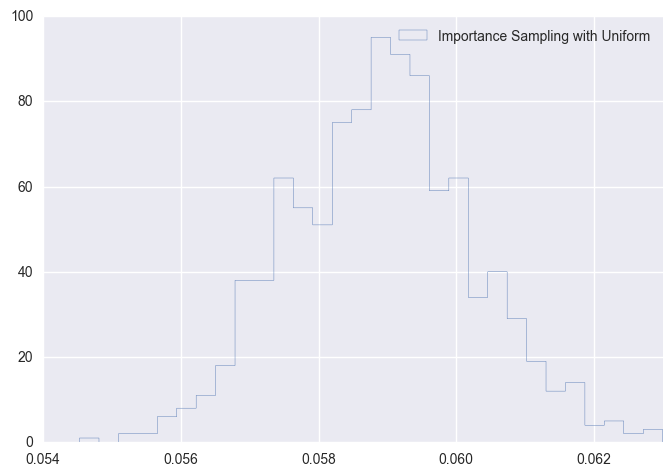

In [7]:
from scipy import stats
from scipy.stats import norm

mu = 6;
sig =2.5;

def P(x):
    y = np.zeros(len(x))
    for i in range(len(x)):
        if (x[i] >= 1 and x[i] <= 3):
            y[i] = (1/12)*(x[i] - 1)
        elif (x[i] > 3 and x[i] <= 5):
            y[i] = -(1/12)*(x[i] - 5)
        elif (x[i] > 5 and x[i] <= 7):
            y[i] = (1/6)*(x[i] - 5)
        elif (x[i] > 7 and x[i] <= 9):
            y[i] = -(1/6)*(x[i] - 9)
        else:
            y[i] = 0
    return y


f = lambda x: 1/(3*np.sqrt(2)*np.pi)*np.exp(-1/18*(x-5)**2)

#infun = lambda x: np.sin(x)-x*np.cos(x)
g = lambda x: 1
normfun = lambda x:  x



#plt.figure(figsize=(18,8))  # set the figure size


# range of integration
xmax =9
xmin =1

# Number of draws 
#N =1000


# ============================================
# IMPORTANCE SAMPLING 
# ============================================
# CHOOSE Gaussian so it similar to the original functions

Iis3 = np.zeros(1000)
for k in np.arange(0,1000):
    # DRAW FROM THE GAUSSIAN mean =2 std = sqrt(0.4) 
    
    xis = np.random.uniform(xmin, xmax,N);
    
    xis = xis[ (xis<xmax) & (xis>xmin)] ;

    normal = normfun(9)-normfun(1);

    
    Iis3[k] =np.mean(P(xis)*f(xis)/g(xis))*normal;
    

print("Mean importance sampling MC estimate: ", np.mean(Iis3))
#print("Standard deviation of our estimates: ", np.std(Iis))
#plt.subplot(1,2,2)
plt.hist(Iis3,30, histtype='step', label=u'Importance Sampling with Uniform');
#plt.hist(Ivmc, 30, color='r',histtype='step', label=u'Vanilla MC');
 
plt.legend()
 
 
 

### Importance Sampling with Normal Proposal Distribution

Mean importance sampling MC estimate:  0.0588696835128


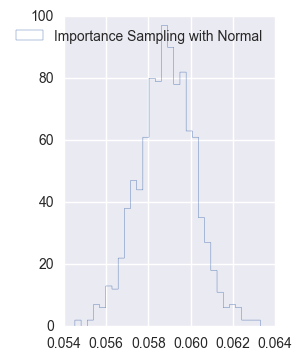

In [47]:
from scipy import stats
from scipy.stats import norm

mu = 5;
sig =2.5;

def P(x):
    y = np.zeros(len(x))
    for i in range(len(x)):
        if (x[i] >= 1 and x[i] <= 3):
            y[i] = (1/12)*(x[i] - 1)
        elif (x[i] > 3 and x[i] <= 5):
            y[i] = -(1/12)*(x[i] - 5)
        elif (x[i] > 5 and x[i] <= 7):
            y[i] = (1/6)*(x[i] - 5)
        elif (x[i] > 7 and x[i] <= 9):
            y[i] = -(1/6)*(x[i] - 9)
        else:
            y[i] = 0
    return y


f = lambda x: 1/(3*np.sqrt(2)*np.pi)*np.exp(-1/18*(x-5)**2)

#infun = lambda x: np.sin(x)-x*np.cos(x)
g = lambda x: (1/np.sqrt(2*np.pi*sig**2))*np.exp(-(x-mu)**2/(2.0*sig**2))
normfun = lambda x:  norm.cdf(x-mu, scale=sig)



#plt.figure(figsize=(18,8))  # set the figure size


# range of integration
xmax =9
xmin =1

# Number of draws 
#N =1000


# ============================================
# IMPORTANCE SAMPLING 
# ============================================
# CHOOSE Gaussian so it similar to the original functions

Iis4 = np.zeros(1000)
for k in np.arange(0,1000):
    # DRAW FROM THE GAUSSIAN mean =2 std = sqrt(0.4) 
    
    xis = mu + sig*np.random.randn(N,1);
    
    xis = xis[ (xis<xmax) & (xis>xmin)] ;
#    print (len(xis))
    # normalization for gaussian from 0..pi
    normal = normfun(9)-normfun(1);

    
    Iis4[k] =np.mean(P(xis)*f(xis)/g(xis))*normal;

print("Mean importance sampling MC estimate: ", np.mean(Iis4))
#print("Standard deviation of our estimates: ", np.std(Iis))
plt.subplot(1,2,2)
plt.hist(Iis4,30, histtype='step', label=u'Importance Sampling with Normal');
#plt.hist(Ivmc, 30, color='r',histtype='step', label=u'Vanilla MC');
 
plt.legend()
 
 
 

## Problem 2: Variance Reduction

### Part A

Compute the variance of each estimate of $\mathbb{E}[h(X)]$ obtained in Problem 1. Based on the discussion on sampling methods in lecture, which sampling methods, proposal distributions is expected, in principle, to resulted in lower variances? How well do your results align with these expectations?

### Part B (Stratified Sampling)

Often, a complex integral can be computed with more ease if one can break up the domain of the integral into pieces and if on each piece of the domain the integral is simplified. 

- Find a natural way to divide the domain of $X$ and express $\mathbb{E}[h(X)]$ as an ***correctly*** weighted sum of integrals over the pieces of the domain of $X$. (This constitutes the essentials of Stratified Sampling)

- Estimate each integral in the summand using rejection sampling using a normal proposal distribution (with sensibly chosen parameters). From these, estimate $\mathbb{E}[h(X)]$.

- Compute the variance of your estimate of $\mathbb{E}[h(X)]$. Compare with the variance of your previous estimate of $\mathbb{E}[h(X)]$ (in Part A, using rejection sampling, a normal proposal distribution over the entire domain of $X$).

Read more about Stratified Sampling:

1. [Variance Reduction Techniques Slides](http://www.sta.nus.edu.sg/~zhangjt/teaching/ST4231/lectures/chapter4.pdf)

2. [Monte Carlo Methods](http://www.public.iastate.edu/~mervyn/stat580/Notes/s09mc.pdf)

3. [Variance Reduction Techniques Chapter](http://sas.uwaterloo.ca/~dlmcleis/s906/chapt4.pdf)

### Part A

In [48]:
print ('Standard deviation of our estimates inverse transform:', np.std(Iis))
print ('Standard deviation of our estimates using uniform rejection sampling:', np.std(Iis1))
print ('Standard deviation of our estimates using normal rejection sampling:', np.std(Iis2))
print ('Standard deviation of our estimates using uniform impoartance sampling:', np.std(Iis3))
print ('Standard deviation of our estimates using normal impoartance sampling:', np.std(Iis4))
print ('Variance of our estimates inverse transforma:', np.var(Iis))
print ('Variance of our estimates using uniform rejection sampling:', np.var(Iis1))
print ('Variance of our estimates using normal rejection sampling:', np.var(Iis2))
print ('Variance of our estimates using uniform impoartance sampling:', np.var(Iis3))
print ('Variance of our estimates using normal impoartance sampling:', np.var(Iis4))

Standard deviation of our estimates inverse transform: 0.000326775178771
Standard deviation of our estimates using uniform rejection sampling: 0.000334791173734
Standard deviation of our estimates using normal rejection sampling: 0.00031427603525
Standard deviation of our estimates using uniform impoartance sampling: 0.00133257469398
Standard deviation of our estimates using normal impoartance sampling: 0.00133003093483
Variance of our estimates inverse transforma: 1.06782017461e-07
Variance of our estimates using uniform rejection sampling: 1.1208513001e-07
Variance of our estimates using normal rejection sampling: 9.87694263324e-08
Variance of our estimates using uniform impoartance sampling: 1.77575531505e-06
Variance of our estimates using normal impoartance sampling: 1.76898228761e-06


By comparing the eatimate variance of different sampling methods, we can conclude that estimate using inverse transform and rejection sampling have smilar variance, which is much smaller than the estimate using importance sampling. 

In princpal, importance sampling has better estimate of target disbution. However, for this problem, because the proposal distribution (uniform/normal) is not well matched with the target distribution. For instance, we set the mean of proposal normal distribution is 5, which indicates the peak of the normal distribution density. But the position of peak corresponds to the notch of our target distrubution. According to our lecture, in order to reduce variance, we should choose more samples near the peak. With a poor proposal distribution, importance sampling may not be a good estimate in the question. Therefore, in the following part, we start to do stratified sampling to achieve better sampling in needed regions by choosing more proposal distributions instead of a one size fitting all sampling scheme. 

It can be found that the variance of the estimate using uniform rejection sampling and normal rejection samplling are close. Since our target distribution is combined with triangles, if we want to make our propsal normal distribution cover the target distribution, we nomally set mean to be the middle of the whole range (such as 5), so most samples are distributed around x = 5. However, the probability of points existing at x = 5 in our target distribution is zero. Therefore, our proposal poorly fit our target model leading to a relatively larger estimate variance.

According to pdf plot of f(x), we naturally divide the domain into 2 pieces, one is between 1 and 5, and the other is between 5 and 9, we apply two normal distributions to fit our target distribution separately.


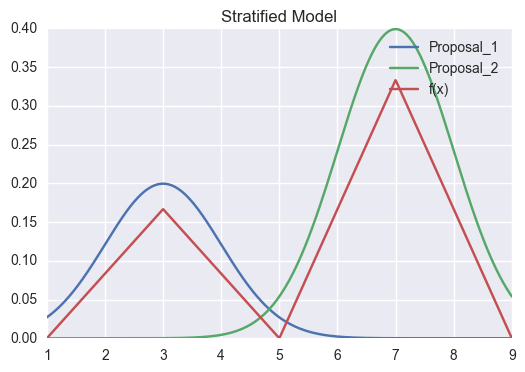

In [53]:
mu1 = 3
sig1 = 1
g1 = lambda x: (1/np.sqrt(2*np.pi*sig1**2))*np.exp(-(x-mu1)**2/(2.0*sig1**2)) 

mu2 = 7
sig2 = 1
g2 = lambda x: (1/np.sqrt(2*np.pi*sig2**2))*np.exp(-(x-mu2)**2/(2.0*sig2**2)) 


N = 1000
Ns = 2   # number of strate 

xvals=np.linspace(xmin, xmax, 1000)

plt.plot(x_p,0.5*g1(xvals),label=u'Proposal_1')
plt.plot(x_p,g2(xvals),label=u'Proposal_2')
plt.plot(x_p,y_p,label=u'f(x)')
plt.legend()
plt.title("Stratified Model")

Intergral of the first half of region:  0.237132038548
Intergral of the first half of region:  0.236684669596
Expectation: 0.059227088518


(array([  2.,   0.,   0.,   3.,   5.,  10.,  10.,  19.,  29.,  37.,  54.,
         57.,  91.,  75.,  87.,  83.,  94.,  75.,  68.,  50.,  38.,  29.,
         39.,  17.,  12.,   7.,   4.,   2.,   1.,   2.]),
 array([ 0.05815894,  0.05822878,  0.05829862,  0.05836845,  0.05843829,
         0.05850813,  0.05857797,  0.05864781,  0.05871764,  0.05878748,
         0.05885732,  0.05892716,  0.058997  ,  0.05906683,  0.05913667,
         0.05920651,  0.05927635,  0.05934619,  0.05941602,  0.05948586,
         0.0595557 ,  0.05962554,  0.05969537,  0.05976521,  0.05983505,
         0.05990489,  0.05997473,  0.06004456,  0.0601144 ,  0.06018424,
         0.06025408]),
 <a list of 1 Patch objects>)

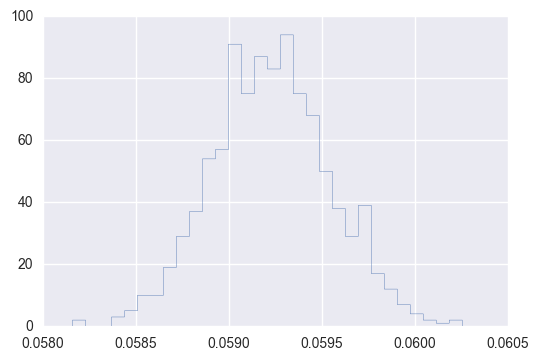

In [55]:


def P(x):
    if (x >= 1 and x <= 3):
        y = (1/12)*(x - 1)
    elif (x > 3 and x <= 5):
        y = -(1/12)*(x - 5)
    elif (x > 5 and x <= 7):
        y = (1/6)*(x - 5)
    elif (x > 7 and x <= 9):
        y = -(1/6)*(x - 9)
    else:
        y = 0
    return y



f = lambda x: 1/(3*np.sqrt(2)*np.pi)*np.exp(-1/18*(x-5)**2)
h1 = np.zeros(500)
h2 = np.zeros(500)
# generation loop
Iis5 = np.zeros(1000)

Iis5_first = np.zeros(1000)
Iis5_second = np.zeros(1000)


Umin=1
Umax =9



for k in np.arange(0,1000):
 
   
    #stratisfied it in Ns regions
    step = (Umax-Umin )/Ns
    
    
    accepted = 0
    while (accepted < 500):
        xproposal = mu1 + sig1*np.random.randn(1)
        y = np.random.uniform(0,1)
        # Do the accept/reject comparison
        if y < P(xproposal)/(0.5*g1(xproposal)):
 #           samples[accepted] = xproposal        
            h1[accepted] = 1/(3*np.sqrt(2)*np.pi)*np.exp(-1/18*(xproposal-5)**2)
            accepted += 1   
         
    accepted = 0
    while (accepted < 500):
        xproposal = mu2 + sig2*np.random.randn(1)
        y = np.random.uniform(0,1)
        # Do the accept/reject comparison
        if y < P(xproposal)/(g2(xproposal)):
#            samples[accepted] = xproposal        
            h2[accepted] = 1/(3*np.sqrt(2)*np.pi)*np.exp(-1/18*(xproposal-5)**2)
            accepted += 1   
        
   # print ('ls',np.mean(h2))
  #  print ('cd',np.mean(h1))  
    Iis5_first[k] = np.mean(h1)*step
    Iis5_second[k] = np.mean(h2)*step
    Iis5[k] = (Iis5_first[k] + Iis5_second[k])/(Umax - Umin)
    #print ("lis",Ii)
    
print ('Intergral of the first half of region: ', np.mean(Iis5_first))
print ('Intergral of the first half of region: ', np.mean(Iis5_second))
print ('Expectation:', np.mean(Iis5))


    
plt.hist(Iis5,30, histtype='step', label=u'Stratified Sampling')


In [59]:
print ('Variance of our estimates inverse transforma:', np.var(Iis))
print ('Variance of our estimates using uniform rejection sampling:', np.var(Iis1))
print ('Variance of our estimates using normal rejection sampling:', np.var(Iis2))
print ('Variance of our estimates using uniform impoartance sampling:', np.var(Iis3))
print ('Variance of our estimates using normal impoartance sampling:', np.var(Iis4))
print ('Variance of our estimates using stratified sampling:', np.var(Iis5))


Variance of our estimates inverse transforma: 1.06782017461e-07
Variance of our estimates using uniform rejection sampling: 1.1208513001e-07
Variance of our estimates using normal rejection sampling: 1.01874568938e-07
Variance of our estimates using uniform impoartance sampling: 1.77575531505e-06
Variance of our estimates using normal impoartance sampling: 1.76898228761e-06
Variance of our estimates using stratified sampling: 9.87384932494e-08


According to the comparisin amony the five distributions, straitified sampling has a better estimate with smaller variance. Especially, compared with rejection sampling using only one normal proposal distribution, straitfied sampling performs better. Intuitively, if each region gets its fair share of points, then we should get a better answer. The simulated results also validate the variance-reduction property of stratified sampling.

On the other hand, though straitified sampling has better performance than using rejection resampling with only one proposal normal distribution, the variance difference is not too much, only around $2\times 10^8$. This bacause the difference between straitified and rejection sampling depends on  $\frac{1}{N} \left(\sum_j p_j \mu_j^2 - \mu^2 \right) $. Since in this senario, mean is relative small, which may not cause too much impact on the whole estimate performace.
